# Graph

Graph = Nodes + edges

$$\mathcal{G} = (\mathcal{V}, \mathcal{E})$$

Node $j$ is called a neighbor of node $i$ if (and only if) node $i$ is connected to node $j$.

## Adjacency matrix

A matrix with rows and columns labeled by nodes, whose $i-$th row, $j-$th column component $a_{ij}$ is $1$ if node $i$ is a neighbor of node $j$, or $0$ otherwise.

$$
\begin{bmatrix}
0 & 1 & 1 & 0\\
1 & 0 & 1 & 0\\
1 & 1 & 0 & 1\\
0 & 0 & 1 & 0
\end{bmatrix}
$$

## Adjecency list 

A list of lists of nodes whose $i-$th component is the list of node $i$'s neighbors.

$$
\begin{align}
1\to & \{2, 3\}\\
2\to & \{1, 3\}\\
3\to & \{1, 2, 4\}\\
4\to & \{3\}\\
\end{align}
$$
## Degree 

The number of edges connected to a node. Node $i$'s degree is often written as $\deg(i)$.

## Walk 

A list of edges that are sequentially connected to form a continuous route on a
network.

## Subgraph

Part of the graph.

## Connected graph 

A graph in which a path exists between any pair of nodes.

## Connected component 

A subgraph of a graph that is connected within itself but not connected to the rest of the graph.

##  Constructing Network Models with NetworkX

- Graph For undirected simple graphs (self-loops are allowed)
- DiGraph For directed simple graphs (self-loops are allowed)
- MultiGraph For undirected multigraphs (self-loops and multiple edges are allowed)
- MultiDiGraph For directed multigraphs (self-loops and multiple edges are allowed)


In [1]:
import networkx as nx

### Graph

In [2]:
# creating a new empty Graph object
g = nx.Graph()

# adding a node named ’John’
g.add_node('John')

# adding a bunch of nodes at once
g.add_nodes_from(['Josh', 'Jane', 'Jess', 'Jack'])

In [3]:
# adding an edge between ’John’ and ’Jane’
g.add_edge('John', 'Jane')

# adding a bunch of edges at once
g.add_edges_from([('Jess', 'Josh'), ('John', 'Jack'), ('Jack', 'Jane')])

# adding more edges
# undefined nodes will be created automatically
g.add_edges_from([('Jess', 'Jill'), ('Jill', 'Jeff'), ('Jeff', 'Jane')])

In [4]:
# removing the edge between ’John’ and ’Jane’
g.remove_edge('John', 'Jane')

# removing the node ’John’
# all edges connected to that node will be removed too
g.remove_node('John')

In [5]:
g

In [6]:
g.nodes()

NodeView(('Josh', 'Jane', 'Jess', 'Jack', 'Jill', 'Jeff'))

In [7]:
g.edges()

EdgeView([('Josh', 'Jess'), ('Jane', 'Jack'), ('Jane', 'Jeff'), ('Jess', 'Jill'), ('Jill', 'Jeff')])

In [8]:
g.nodes['Jeff']['job'] = 'student'
g.nodes['Jeff']['age'] = 20
g.nodes['Jeff']

{'job': 'student', 'age': 20}

In [9]:
g.edges['Jeff', 'Jane']['trust'] = 1.0
g.edges['Josh', 'Jess']['love'] = True
g.edges['Jess', 'Josh']['love']

True

In [10]:
g.get_edge_data('Jeff', 'Jane')

{'trust': 1.0}

### DiGraph

In [11]:
g = nx.DiGraph()
g.add_edge('Josh', 'Jess')
g.edges['Josh', 'Jess']['love'] = True
g.edges['Josh', 'Jess']

{'love': True}

```python
g.edges['Jess', 'Josh']

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
~\AppData\Local\Temp/ipykernel_27068/2842950319.py in <module>
----> 1 g.edges['Jess', 'Josh']

~\anaconda3\envs\AIML\lib\site-packages\networkx\classes\reportviews.py in __getitem__(self, e)
   1083             )
   1084         u, v = e
-> 1085         return self._adjdict[u][v]
   1086 
   1087     # EdgeDataView methods

KeyError: 'Josh'
```

In [12]:
# complete graph made of 5 nodes
g1 = nx.complete_graph(5)
g1.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)])

In [13]:
# complete (fully connected) bipartite graph
# made of group of 3 nodes and group of 4 nodes
g2 = nx.complete_bipartite_graph(3, 4)
g2.edges()

EdgeView([(0, 3), (0, 4), (0, 5), (0, 6), (1, 3), (1, 4), (1, 5), (1, 6), (2, 3), (2, 4), (2, 5), (2, 6)])

In [14]:
# Zachary’s Karate Club graph
g3 = nx.karate_club_graph()
g3.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)])

## Visualizing Networks with NetworkX


In [15]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

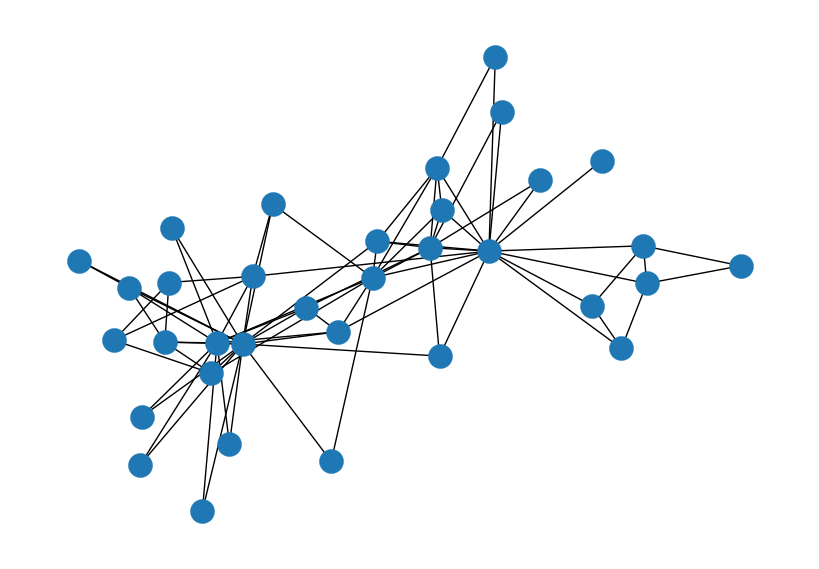

In [16]:
g = nx.karate_club_graph()
nx.draw(g)
plt.show()

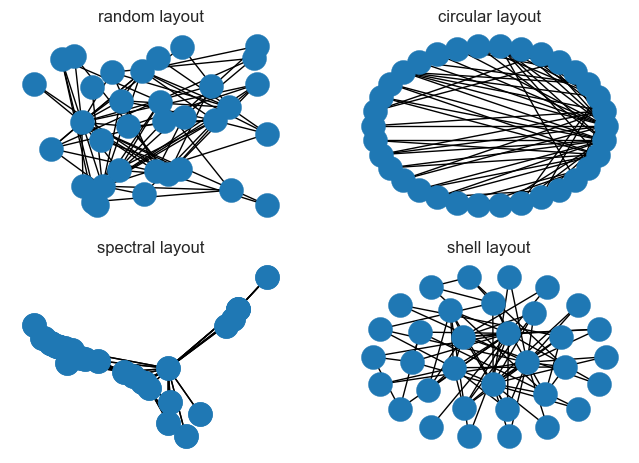

In [17]:
g = nx.karate_club_graph()

plt.subplot(221)
nx.draw_random(g)
plt.title('random layout')

plt.subplot(222)
nx.draw_circular(g)
plt.title('circular layout')

plt.subplot(223)
nx.draw_spectral(g)
plt.title('spectral layout')

plt.subplot(223)
nx.draw_spectral(g)
plt.title('spectral layout')

plt.subplot(224)
shells = [[0, 1, 2, 32, 33],
[3, 5, 6, 7, 8, 13, 23, 27, 29, 30, 31],
[4, 9, 10, 11, 12, 14, 15, 16, 17, 18,
19, 20, 21, 22, 24, 25, 26, 28]]

nx.draw_shell(g, nlist = shells)
plt.title('shell layout')

plt.show()

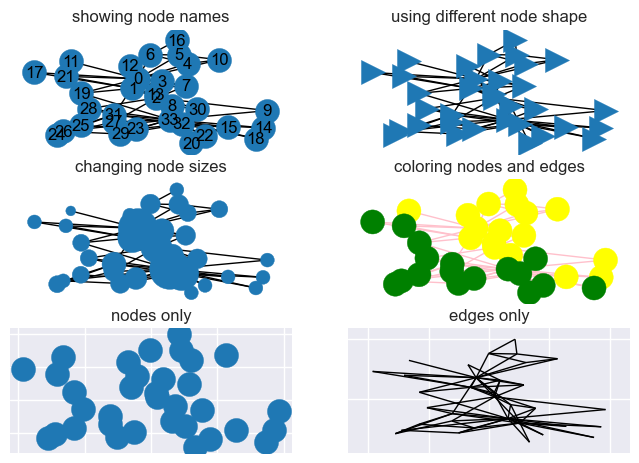

In [18]:
g = nx.karate_club_graph()
positions = nx.spring_layout(g)

plt.subplot(3, 2, 1)
nx.draw(g, positions, with_labels = True)
plt.title('showing node names')

plt.subplot(3, 2, 2)
nx.draw(g, positions, node_shape = '>')
plt.title('using different node shape')

plt.subplot(3, 2, 3)
nx.draw(g, positions, node_size = [g.degree(i) * 50 for i in g.nodes()])
plt.title('changing node sizes')

plt.subplot(3, 2, 4)
nx.draw(g, positions, edge_color = 'pink',node_color = ['yellow' if i < 17 else 'green' for i in g.nodes()])
plt.title('coloring nodes and edges')

plt.subplot(3, 2, 5)
nx.draw_networkx_nodes(g, positions)
plt.title('nodes only')

plt.subplot(3, 2, 6)
nx.draw_networkx_edges(g, positions)
plt.title('edges only')

plt.show()

In [19]:
g = nx.complete_graph(5)
nx.write_adjlist(g, 'complete-graph.txt')

```
#C:\Users\User\anaconda3\envs\AIML\lib\site-packages\ipykernel_launcher.py -f C:\Users\User\AppData\Roaming\jupyter\runtime\kernel-7ed06c87-9169-46fb-b96c-d98d27c63576.json
# GMT Wed Jul 12 03:23:24 2023
# 
0 1 2 3 4
1 2 3 4
2 3 4
3 4
4
```

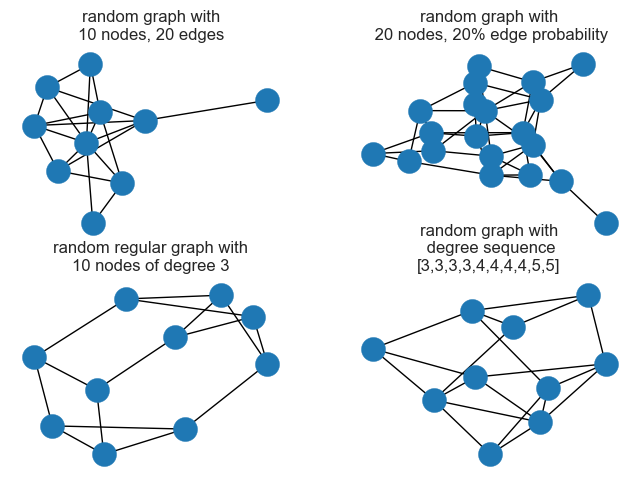

In [20]:
plt.subplot(2, 2, 1)
nx.draw(nx.gnm_random_graph(10, 20))
plt.title('random graph with\n10 nodes, 20 edges')

plt.subplot(2, 2, 2)
nx.draw(nx.gnp_random_graph(20, 0.2))
plt.title('random graph with\n 20 nodes, 20% edge probability')

plt.subplot(2, 2, 3)
nx.draw(nx.random_regular_graph(3, 10))
plt.title('random regular graph with\n10 nodes of degree 3')

plt.subplot(2, 2, 4)
nx.draw(nx.random_degree_sequence_graph([3,3,3,3,4,4,4,4,5,5]))
plt.title('random graph with\n degree sequence\n[3,3,3,3,4,4,4,4,5,5]')
plt.show()

# Dynamics on Networks

## Information/culture propagation on organizational/social networks

In [21]:
from random import random

In [22]:
g = nx.krackhardt_kite_graph()

In [23]:
g.neighbors(0)

In [24]:
g.degree(0)

4

### Net Marjority

In [25]:
import numpy as np

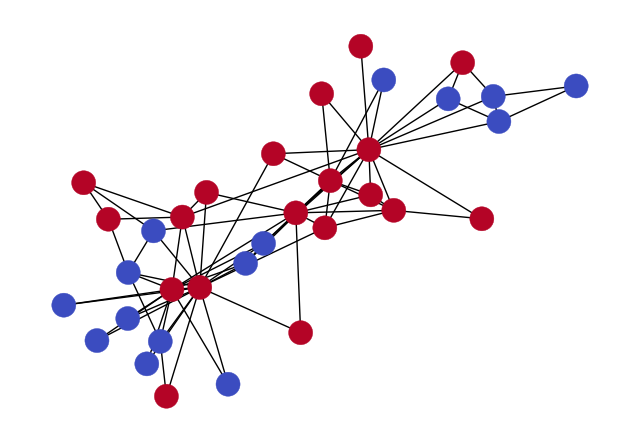

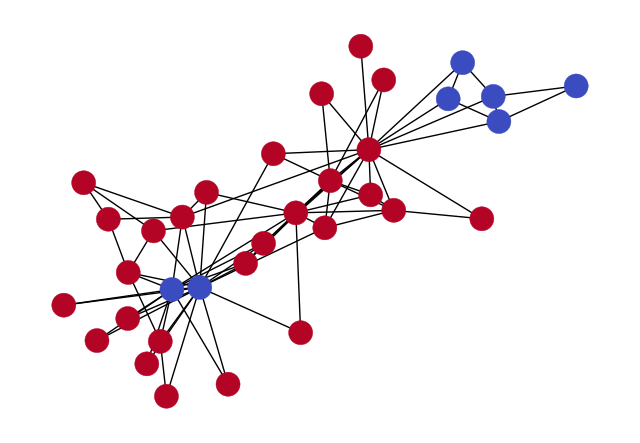

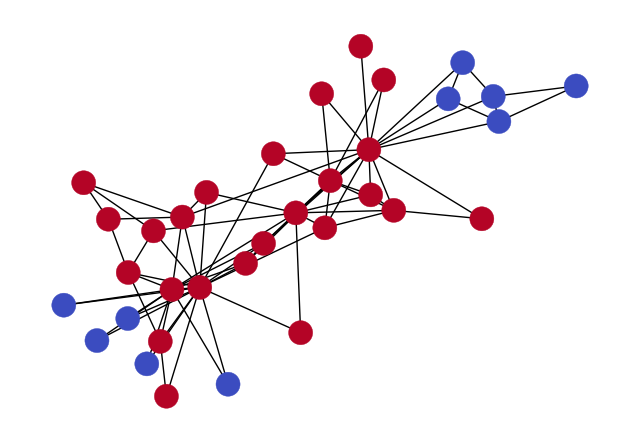

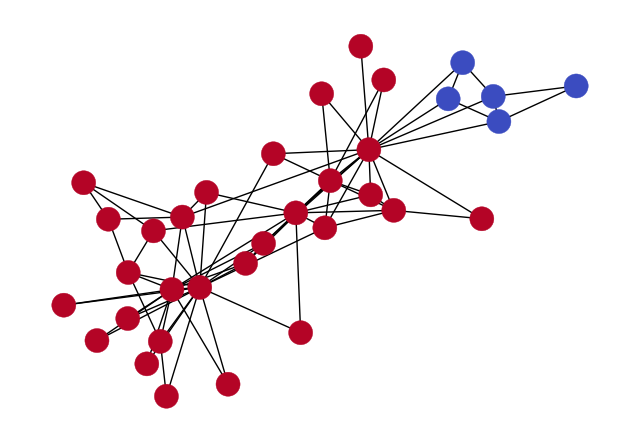

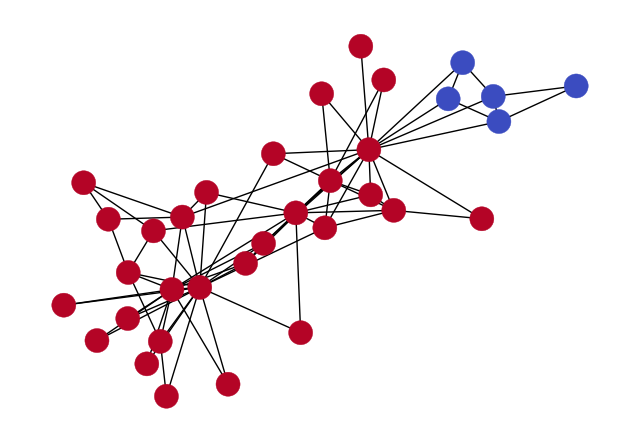

In [26]:
# initialize a graph

g = nx.karate_club_graph()
pos = nx.spring_layout(g)

np.random.seed(20)
init_state = np.where(np.random.randn(len(g.nodes)) < 0.5, 1, 0)

for i in g.nodes():
    g.nodes[i]['state'] = init_state[i]
    
nextg = g.copy()

# simulate
for _ in range(5):
    for i in g.nodes():
        count = g.nodes[i]['state']
        for j in g.neighbors(i):
            count += g.nodes[j]['state']
        ratio = count / (g.degree(i) + 1.0)

        if ratio > 0.5:
            new_state = 1
        elif ratio <0.5:
            new_state = 0
        else:
            new_state = 1 if random() < 0.5 else 0

        nextg.nodes[i]['state'] = new_state

    g, nextg = nextg, g
    
    
    plt.cla()
    nx.draw(g, cmap=plt.cm.coolwarm, vmin=0, vmax=1,
            node_color=[g.nodes[n]['state'] for n in g.nodes()],
            pos=pos)
    plt.show()

In [27]:
from matplotlib import animation
from matplotlib import rc
rc('animation', html='html5')

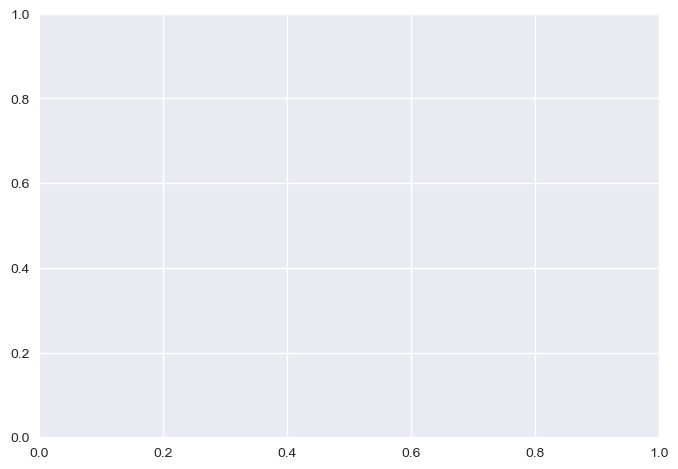

In [28]:
# initialize a graph
g = nx.karate_club_graph()
pos = nx.spring_layout(g)

np.random.seed(20)
init_state = np.where(np.random.randn(len(g.nodes)) < 0.5, 1, 0)

for i in g.nodes():
    g.nodes[i]['state'] = init_state[i]
    
nextg = g.copy()

# Initial drawing
plt.cla()
fig, ax = plt.subplots(figsize=(6,4))
plt.close()

# simulate
def animate(frame):
    global g, nextg
    ax.clear()
    
    
    for i in g.nodes():
        count = g.nodes[i]['state']
        for j in g.neighbors(i):
            count += g.nodes[j]['state']
        ratio = count / (g.degree(i) + 1.0)

        if ratio > 0.5:
            new_state = 1
        elif ratio <0.5:
            new_state = 0
        else:
            new_state = 1 if random() < 0.5 else 0

        nextg.nodes[i]['state'] = new_state
        
    plt.cla()
    nx.draw(g, cmap=plt.cm.coolwarm, vmin=0, vmax=1,
            node_color=[g.nodes[n]['state'] for n in g.nodes()],
            pos=pos,
            ax=ax)
    plt.close()
    g, nextg = nextg, g
    

In [29]:
anim = animation.FuncAnimation(fig, animate, frames=10, interval=1000)

In [30]:
anim

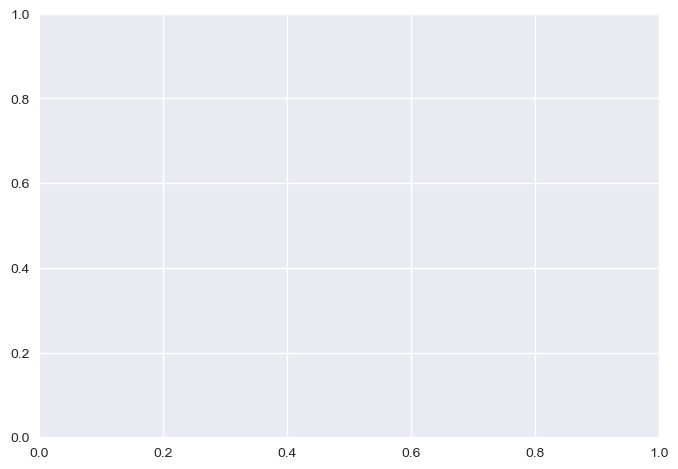

In [37]:
# initialize a graph
g = nx.gnm_random_graph(5000, 10000, seed=42)
pos = nx.circular_layout(g)

np.random.seed(42)
init_state = np.where(np.random.randn(len(g.nodes)) <= 0.5, 1, 0)

for i in g.nodes():
    g.nodes[i]['state'] = init_state[i]
    
nextg = g.copy()

# Initial drawing
plt.cla()
fig, ax = plt.subplots(figsize=(16,16))
plt.close()

# simulate
def animate(frame):
    global g, nextg
    ax.clear()
    
    all_count = 0
    for i in g.nodes():
        count = 0 #g.nodes[i]['state']
        all_count += g.nodes[i]['state']
        for j in g.neighbors(i):
            count += g.nodes[j]['state']
        ratio = count / (g.degree(i)+1.0)

        if ratio > 0.5:
            new_state = 1
        elif ratio <0.5:
            new_state = 0
        else:
            new_state = 1 if random() < 0.8 else 0

        nextg.nodes[i]['state'] = new_state
        
    plt.cla()
    nx.draw(g, cmap=plt.cm.binary, vmin=0, vmax=1,
            node_color=[g.nodes[n]['state'] for n in g.nodes()],
            pos=pos, node_size=10, ax=ax, alpha=0.5, width=0.1)
    ax.set_title(f'Black: {all_count}\nWhite: {5000-all_count}', fontdict={'size':28})
    plt.close()
    g, nextg = nextg, g

In [38]:
anim = animation.FuncAnimation(fig, animate, frames=30, interval=1000)

In [39]:
anim